<a href="https://colab.research.google.com/github/Laura-Neff/ReadCleanExploreDataset/blob/main/ReadCleanExploreDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


In [2]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import sklearn
import pandas as pd
import numpy as np 

import datetime 

In [4]:
print(sklearn.__version__)

1.0.2


In [5]:
print(np.__version__)

1.21.6


In [6]:
print(pd.__version__)

1.3.5


In [52]:
automobile_df = pd.read_csv('cars.csv')

In [8]:
automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [9]:
automobile_df.shape

(394, 12)

In [57]:
automobile_df = automobile_df.replace('?', np.nan) #replace ? with NaN

In [58]:
automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [59]:
automobile_df.isna().sum() #counts all null values in each column

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [60]:
automobile_df['MPG'] = automobile_df['MPG'].fillna(automobile_df['MPG'].mean()) #fill MPG null vals with the mean

In [61]:
automobile_df.isna().sum() #check how many null values MPG column has

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [62]:
automobile_df = automobile_df.dropna() #drop all null vals

In [63]:
automobile_df.shape

(387, 12)

In [64]:
automobile_df.isnull().sum() #count all null vals in each column 

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [66]:
automobile_df.drop(['Model'], axis=1, inplace=True)

In [67]:
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
338,30.0,4,135,84,2385,12.9,1981,US,3.31,3.23,8.5
162,21.0,6,231,110,3039,15,1975,US,3.19,3.03,9
68,12.0,8,350,160,4456,13.5,1972[1973],US,3.58,3.64,21.5
337,23.5,6,173,110,2725,12.6,1981,US,3.15,3.58,9.1
35,19.0,6,250,88,3302,15.5,1971[1973],US,2.91,3.41,9.2


In [68]:
automobile_df.drop(['bore', 'stroke', 'compression-ratio'], inplace=True, axis=1)

In [70]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [75]:
automobile_df['Year'].str.isnumeric().value_counts() #count how many numeric vals we have and how many we don't

True     351
False     36
Name: Year, dtype: int64

In [76]:
automobile_df['Year'].loc[automobile_df['Year'].str.isnumeric() == False] #locations where we don't have numerical vals

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [77]:
extr = automobile_df['Year'].str.extract(r'^(\d{4})', expand=False) #runs a Regular expression to extract the first 4 characters to fix problem

extr.head()

0    1970
3    1970
4    1970
6    1970
7    1970
Name: Year, dtype: object

In [78]:
automobile_df['Year'].isnull().values.any()

False

In [79]:
automobile_df['Year'] = pd.to_numeric(extr)
automobile_df['Year'].dtype #means we successfully got rid of non-numeric vals

dtype('int64')

In [80]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970,"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970,US]
6,14.000000,8,454,220,4354,9,1970,"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [81]:
automobile_df['Age'] = datetime.datetime.now().year - automobile_df['Year'] #Add age column

automobile_df.drop(['Year'], axis=1, inplace=True) #Get rid of Year column

automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
35,19.0,6,250,88,3302,15.5,US,51
125,19.0,6,232,100,2901,16,US,48
130,25.0,4,140,75,2542,17,US,48
288,15.5,8,351,142,4054,14.3,US,43
222,15.0,8,302,130,4295,14.9,US,45


In [82]:
automobile_df.dtypes #see if we have any objects

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [83]:
automobile_df['Cylinders'].isnull().values.any()

False

In [84]:
automobile_df['Cylinders'].str.isnumeric().value_counts()

True     378
False      9
Name: Cylinders, dtype: int64

In [87]:
automobile_df['Cylinders'].loc[automobile_df['Cylinders'].str.isnumeric() == False]
#The results here are representations of missing values in this scenario

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [86]:
cylinders = automobile_df['Cylinders'].loc[automobile_df['Cylinders'] != '-']

In [88]:
cmean = cylinders.astype(int).mean()

In [89]:
automobile_df['Cylinders'] = automobile_df['Cylinders'].replace('-', cmean).astype(int)

In [90]:
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [92]:
automobile_df['Displacement'] = pd.to_numeric(automobile_df['Displacement'], errors='coerce') #convert non-numeric types to NaN

automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [93]:
automobile_df['Weight'] = pd.to_numeric(automobile_df['Weight'], errors='coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration     object
Origin           object
Age               int64
dtype: object

In [94]:
automobile_df['Acceleration'] = pd.to_numeric(automobile_df['Acceleration'], errors='coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [95]:
automobile_df['Origin'].head(15)

0     US; Detroit, Michigan
3                        US
4                       US]
6     US; Detroit, Michigan
7                        US
8                        US
9                       US]
10                       US
11                       US
12    US; Detroit, Michigan
13                       US
14             Japan; Aichi
15                       US
16                      US]
17                       US
Name: Origin, dtype: object

In [96]:
automobile_df['Origin'].unique() #Print distinct values for the origin

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [97]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('US'), 
                                   'US', 
                                   automobile_df['Origin'])

automobile_df['Origin'].unique() #For vals that contain US, just return US

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [98]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Japan'), 
                                   'Japan',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique() #Do same for Japan and other countries

array(['US', 'Japan', 'Europe-Germany', 'Europe', 'Europe Germany'],
      dtype=object)

In [99]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Europe'), 
                                   'Europe', 
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [100]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,45.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,40.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,43.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,46.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,49.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,52.000000


In [103]:
automobile_df.to_csv('cars_processed.csv', index=False)

In [104]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Miles per gallon')

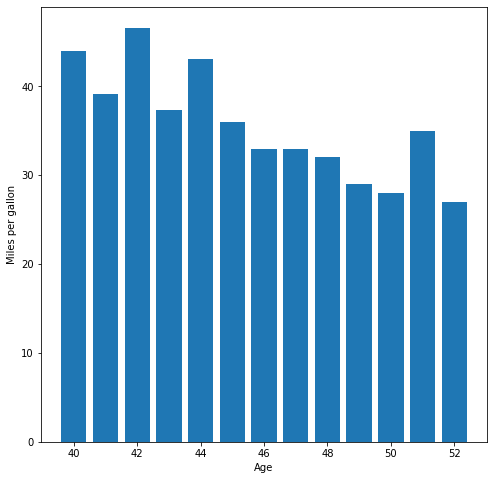

In [105]:
plt.figure(figsize=(8, 8))

plt.bar(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon') #Plot a bar graph of the Age vs. the MPG

Text(0, 0.5, 'Miles per gallon')

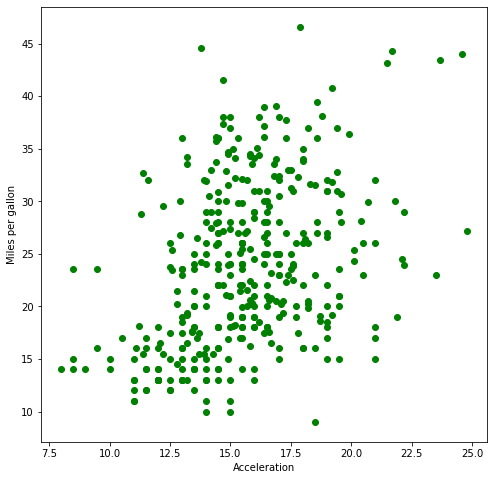

In [106]:
plt.figure(figsize=(8, 8))

plt.scatter(automobile_df['Acceleration'], automobile_df['MPG'], color='g')

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon') #Now plot Acceleration vs. MPG as a scatter plot and in green

Text(0, 0.5, 'Miles per gallon')

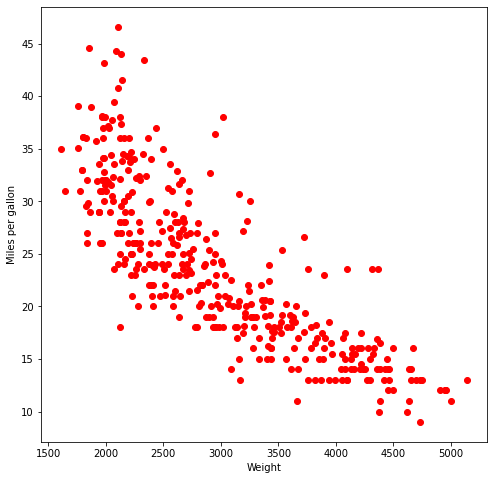

In [107]:
plt.figure(figsize=(8, 8))

plt.scatter(automobile_df['Weight'], automobile_df['MPG'], color='r')

plt.xlabel('Weight')
plt.ylabel('Miles per gallon') #Plot scatter plot of weight vs. MPG

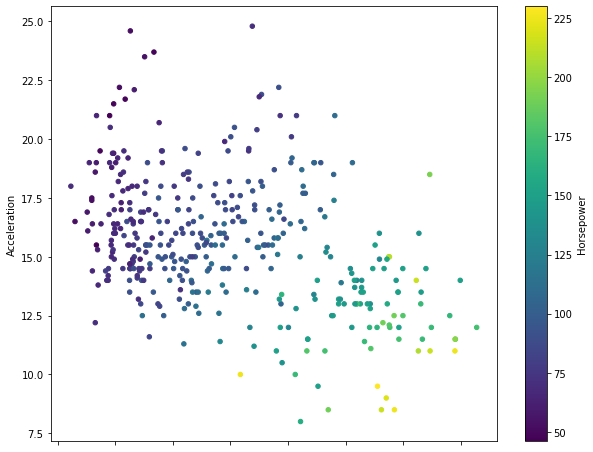

In [108]:
automobile_df.plot.scatter(x='Weight',
                           y='Acceleration',
                           c='Horsepower',
                           colormap='viridis',
                           figsize=(10, 8)); #do a scatter plot of weight, acceleration, and horsepower. Horsepower is shown through colors
                           #Lighter cars have more horsepower and more acceleration. Heavier cars have less acceleration and less horsepower

Text(0, 0.5, 'Miles per gallon')

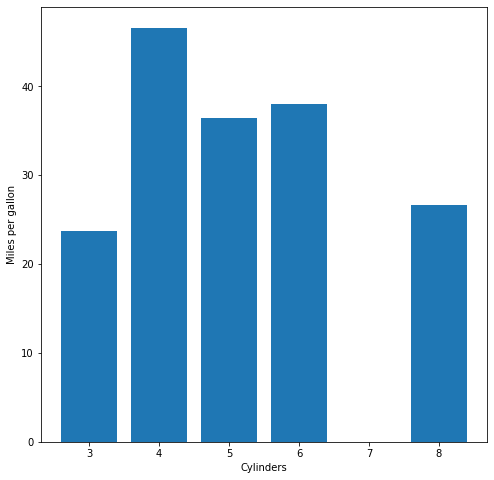

In [109]:
plt.figure(figsize=(8, 8))

plt.bar(automobile_df['Cylinders'], automobile_df['MPG'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon') #Plot Cylinders vs. MPG
                               #Can't see clear relationship between cylinders vs. MPG

In [111]:
automobile_df.drop(['Cylinders', 'Origin'], inplace=True, axis=1)

In [112]:
automobile_df.sample(10)

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
368,27.000000,151.0,90,2735,18.0,40
70,23.551429,70.0,97,2330,13.5,50
261,17.700000,231.0,165,3445,13.4,44
234,25.500000,140.0,89,2755,15.8,45
376,36.000000,120.0,88,2160,14.5,40
8,14.000000,455.0,225,4425,8.5,52
256,20.600000,231.0,105,3380,15.8,44
17,21.000000,200.0,85,2587,16.0,52
313,24.300000,151.0,90,3003,20.1,42
259,18.100000,258.0,120,3410,15.1,44


In [113]:
cars_corr = automobile_df.corr() #determine relationships with the correlation function and see the relationships between each variable
cars_corr

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Displacement,-0.788492,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.357047,0.404458,0.299049,-0.292705,1.000000


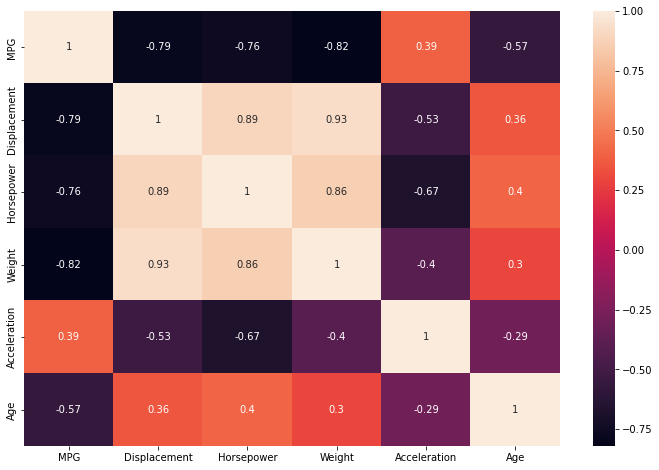

In [114]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(cars_corr, annot=True)